In [2]:
import tensorflow as tf 
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50,MobileNetV2
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D,Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt


In [3]:
data_dir = './dataset'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./1.25, validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale=1./1.25, validation_split=0.2)

In [55]:
train_gen = train_datagen.flow_from_directory(
    data_dir,
    batch_size=16,
    target_size=(224,224),
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 79 images belonging to 2 classes.


In [56]:
validation_gen = validation_datagen.flow_from_directory(
    data_dir,
    batch_size=16,
    target_size=(224,224),
    class_mode='binary',
    subset='validation',
    shuffle = True
)

Found 18 images belonging to 2 classes.


In [60]:

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model1 = Model(inputs=base_model.input, outputs=predictions)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model1.summary()

In [61]:
model2 = models.Sequential([
    VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    

In [64]:
model3 = models.Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])    

In [42]:

history1 = model1.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=10,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // validation_gen.batch_size,
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 769ms/step - accuracy: 0.4444 - loss: 0.9211 - val_accuracy: 0.6875 - val_loss: 0.6796
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.5000 - loss: 0.6587 - val_accuracy: 0.5000 - val_loss: 0.7486
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.6508 - loss: 0.6402 - val_accuracy: 0.5000 - val_loss: 0.7001
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6875 - loss: 0.6810 - val_accuracy: 0.5000 - val_loss: 0.6915
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 0.6825 - loss: 0.5840 - val_accuracy: 0.7500 - val_loss: 0.5961
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.6250 - loss: 0.7603 - val_accuracy: 0.8750 - val_loss: 0.5516
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.8095 - loss: 0.4657 - val_accuracy: 0.5625 - val_loss: 0.7040
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6250 - loss: 0.6672 - val_accuracy: 0.5625 - val_loss: 0

In [62]:
history2 = model2.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=10,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // validation_gen.batch_size,
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.5238 - loss: 50.5115 - val_accuracy: 0.5000 - val_loss: 2.5166
Epoch 2/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 25s 9s/step - accuracy: 0.5625 - loss: 2.0686

c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 758ms/step - accuracy: 0.5625 - loss: 2.0686 - val_accuracy: 0.5000 - val_loss: 111.7831
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 0.5000 - loss: 49.1304 - val_accuracy: 0.4375 - val_loss: 0.7435
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4000 - loss: 0.7682 - val_accuracy: 0.5625 - val_loss: 0.6867
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 70s 14s/step - accuracy: 0.3651 - loss: 0.9545 - val_accuracy: 0.5625 - val_loss: 0.6993
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 700ms/step - accuracy: 0.5625 - loss: 0.7291 - val_accuracy: 0.6875 - val_loss: 0.6728
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 9s/step - accuracy: 0.6508 - loss: 0.6443 - val_accuracy: 0.4375 - val_loss: 0.7783
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 695ms/step - accuracy: 0.6250 - loss: 0.7099 - val_accuracy: 0.5625 - val_loss: 1.9755
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.5079 - loss: 1.0415 - val_accuracy: 0.4375 - val_loss: 0.9511
Epoch

In [65]:
history3 = model3.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    epochs=10,
    validation_data=validation_gen,
    validation_steps=validation_gen.samples // validation_gen.batch_size,
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.4762 - loss: 9.2134 - val_accuracy: 0.5000 - val_loss: 7.1707
Epoch 2/10
1/4 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.7500 - loss: 0.4453

c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.7500 - loss: 0.4453 - val_accuracy: 0.5625 - val_loss: 28.6008
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.8730 - loss: 0.4719 - val_accuracy: 0.5625 - val_loss: 107.9501
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms/step - accuracy: 0.9375 - loss: 0.2470 - val_accuracy: 0.5000 - val_loss: 168.0366
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.9048 - loss: 0.6992 - val_accuracy: 0.5625 - val_loss: 263.9656
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.8750 - loss: 1.6957 - val_accuracy: 0.5625 - val_loss: 185.1639
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.9683 - loss: 0.4310 - val_accuracy: 0.6250 - val_loss: 618.6196
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 298ms/step - accuracy: 0.9375 - loss: 0.0920 - val_accuracy: 0.6875 - val_loss: 965.1254
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.9841 - loss: 0.0524 - val_accuracy: 0.5000 - val_loss: 3182.

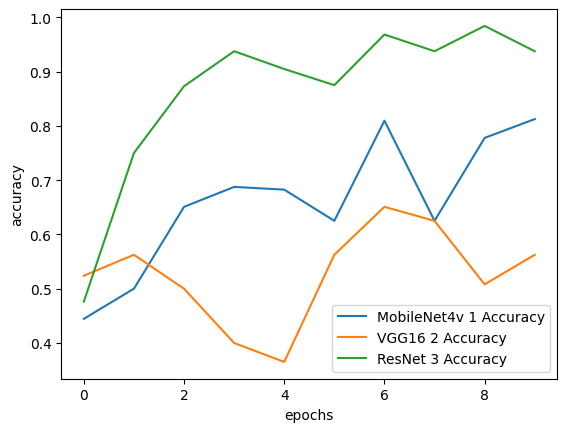

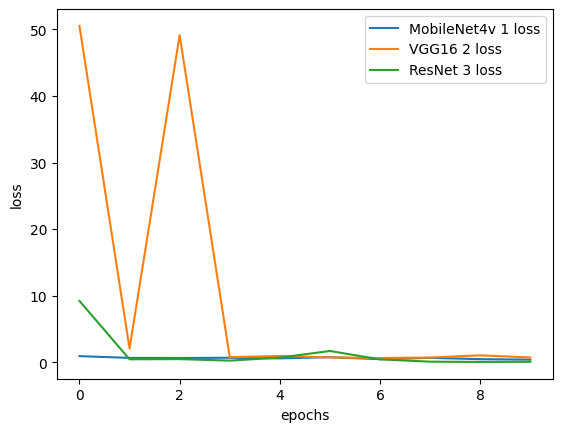

In [68]:
plt.plot(history1.history['accuracy'],label='MobileNet4v 1 Accuracy')
plt.plot(history2.history['accuracy'],label='VGG16 2 Accuracy')
plt.plot(history3.history['accuracy'],label='ResNet 3 Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history1.history['loss'],label='MobileNet4v 1 loss',)
plt.plot(history2.history['loss'],label='VGG16 2 loss')
plt.plot(history3.history['loss'],label='ResNet 3 loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


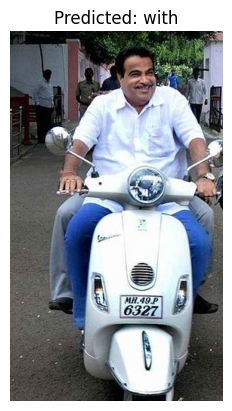

Prediction: with (Raw output: [[1.]])


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path = "./test/test7.jpg"

img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0 

prediction = model3.predict(img_array)

class_labels = ['no', 'with']  
predicted_index = int(prediction[0][0] > 0.5) if prediction.shape[-1] == 1 else np.argmax(prediction)
predicted_class = class_labels[predicted_index]

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"Prediction: {predicted_class} (Raw output: {prediction})")


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

validation_gen.reset()
y_true = validation_gen.classes
y_pred_prob = model1.predict(validation_gen, steps=validation_gen.samples//validation_gen.batch_size+1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['no','with']))

print("F1 Score:", f1_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step

Confusion Matrix:
[[ 8  0]
 [10  0]]

Classification Report:
              precision    recall  f1-score   support

          no       0.44      1.00      0.62         8
        with       0.00      0.00      0.00        10

    accuracy                           0.44        18
   macro avg       0.22      0.50      0.31        18
weighted avg       0.20      0.44      0.27        18

F1 Score: 0.0
Recall: 0.0
Precision: 0.0


c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


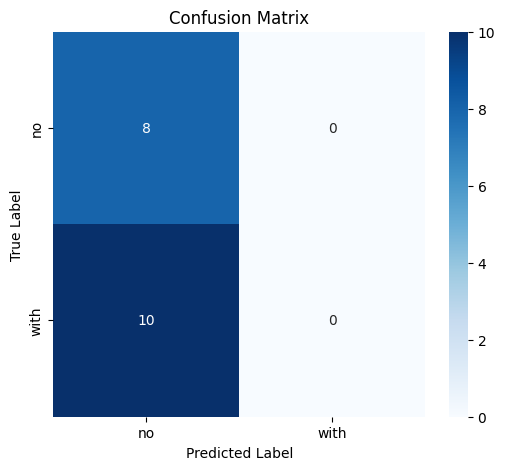

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = validation_gen.classes
y_pred_prob = model1.predict(validation_gen)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
classes = ['no', 'with']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

validation_gen.reset()
y_true = validation_gen.classes
y_pred_prob = model2.predict(validation_gen, steps=validation_gen.samples//validation_gen.batch_size+1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['no','with']))

print("F1 Score:", f1_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step

Confusion Matrix:
[[ 8  0]
 [10  0]]

Classification Report:
              precision    recall  f1-score   support

          no       0.44      1.00      0.62         8
        with       0.00      0.00      0.00        10

    accuracy                           0.44        18
   macro avg       0.22      0.50      0.31        18
weighted avg       0.20      0.44      0.27        18

F1 Score: 0.0
Recall: 0.0
Precision: 0.0


c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hisha\Desktop\New\traffic\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/stepWARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F2C43BE9E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step


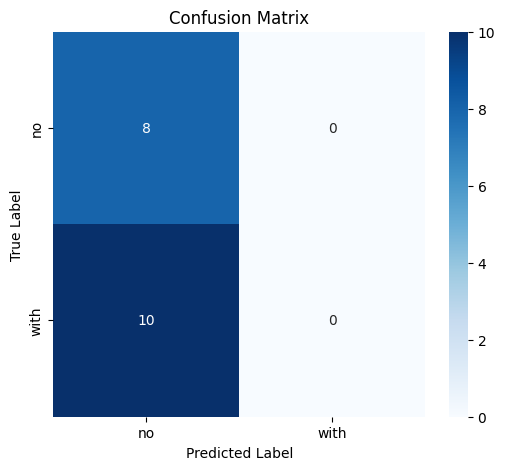

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = validation_gen.classes
y_pred_prob = model2.predict(validation_gen)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_true, y_pred)
classes = ['no', 'with']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()